In [1]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, iso_calculator, OrbAtt_augment_loop
import pandas as pd

In [2]:
# reading in electron counts file: day ### of year ####
year = '1993'
start_day = '053'

file = 'hhrr' + year + start_day + '.txt'
t, r1, r2, r3, r4 = read(file)

In [3]:
# code is specific for year 1993
OrbAtt_names = np.array(['OrbAtt_secofyear_1993001-1993012.txt', 'OrbAtt_secofyear_1993013-1993039.txt', 'OrbAtt_secofyear_1993040-1993066.txt', \
                         'OrbAtt_secofyear_1993067-1993093.txt', 'OrbAtt_secofyear_1993094-1993120.txt', 'OrbAtt_secofyear_1993121-1993147.txt', \
                         'OrbAtt_secofyear_1993148-1993174.txt', 'OrbAtt_secofyear_1993175-1993201.txt', 'OrbAtt_secofyear_1993202-1993228.txt', \
                         'OrbAtt_secofyear_1993229-1993255.txt', 'OrbAtt_secofyear_1993256-1993282.txt', 'OrbAtt_secofyear_1993283-1993309.txt', \
                         'OrbAtt_secofyear_1993310-1993336.txt', 'OrbAtt_secofyear_1993337-1993363.txt', 'OrbAtt_secofyear_1993364-1993365.txt'])

In [4]:
# find microburst times and N_100, SSD1, SSD4 counts using algorithm
t_microburst, N_100_microburst, r1_microburst, r4_microburst, mb_index, MB_mask, N_100, A_500 = mb_finder(t, r1, r2, r3, r4)

In [5]:
# calculation of the isotropy indices of electron counts
iso_indices = iso_calculator(r1_microburst, r4_microburst)

In [6]:
# reading in orbit/attitude data file: day ### of year ####
OrbAtt_mask = []
for i in np.arange(len(OrbAtt_names)):
    OrbAtt_mask.append(int(start_day) >= int(OrbAtt_names[i][21:24]) and int(start_day) <= int(OrbAtt_names[i][29:32]))
        
OA_file = OrbAtt_names[OrbAtt_mask][0]

directory = 'D:\SAMPEX_Data\\' + year + '_data\\'
OrbAtt_data = pd.read_csv(directory + OA_file, names = ['day', 'hr', 'min', 'sec', 'GEO_Radius', 'GEO_Long', 'GEO_Lat', 'Altitude', 
                                                            'L_Shell', 'MLT', 'SAA_Flag', 'Pitch', 'zenith', 'azimuth', 'Att_Flag'], sep = '\s+', header = 70)
# Augment OrbAtt data to fit counts data
t_OrbAtt, LS_OrbAtt, MLT_OrbAtt, P_OrbAtt, Lat_OrbAtt, Long_OrbAtt, R_OrbAtt, t, r1, r2, r3, r4 = OrbAtt_augment_loop(t, r1, r2, r3, r4, OrbAtt_data, int(start_day))

t_OrbAtt_mb = t_OrbAtt[mb_index]; LS_OrbAtt_mb = LS_OrbAtt[mb_index]; MLT_OrbAtt_mb = MLT_OrbAtt[mb_index];
P_OrbAtt_mb = P_OrbAtt[mb_index]; Lat_OrbAtt_mb = Lat_OrbAtt[mb_index]; Long_OrbAtt_mb = Long_OrbAtt[mb_index]

In [7]:
len(t_OrbAtt)

516480

In [8]:
len(t)

516480

# 1. Iso vs Parameter correlations

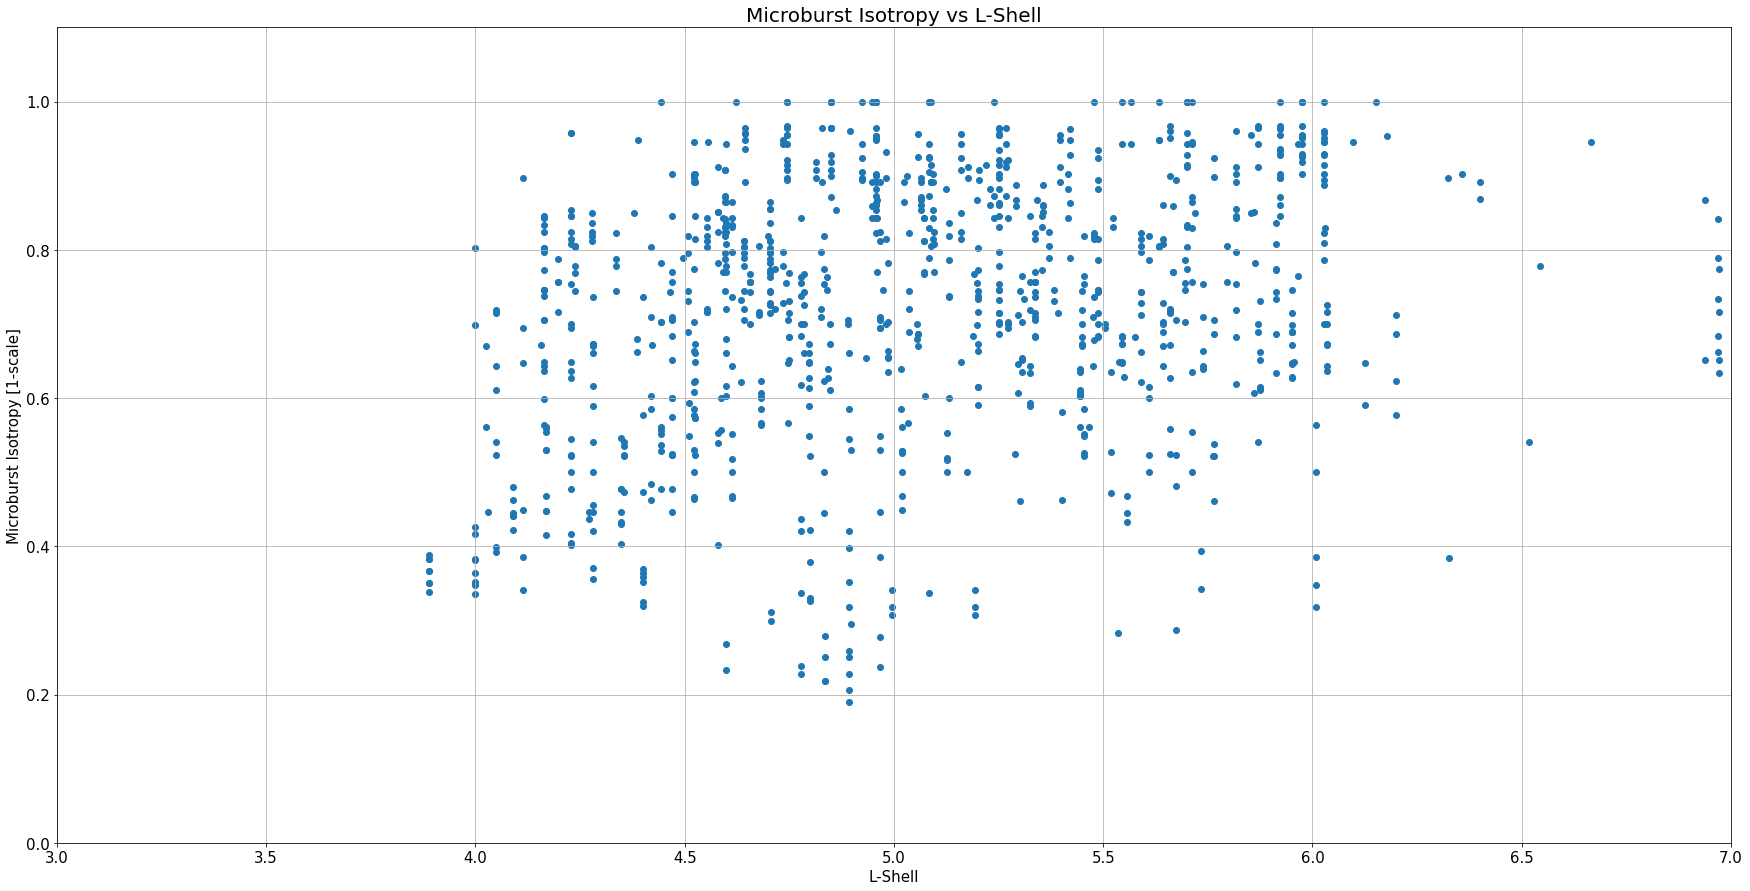

In [9]:
plt.figure(figsize = (30,15))
plt.title('Microburst Isotropy vs L-Shell', fontsize = 20)
plt.scatter(LS_OrbAtt_mb, iso_indices)
plt.xlabel('L-Shell', fontsize = 15)
plt.ylabel('Microburst Isotropy [1-scale]', fontsize = 15)
plt.ylim(0, 1.1)
plt.xlim(3,7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

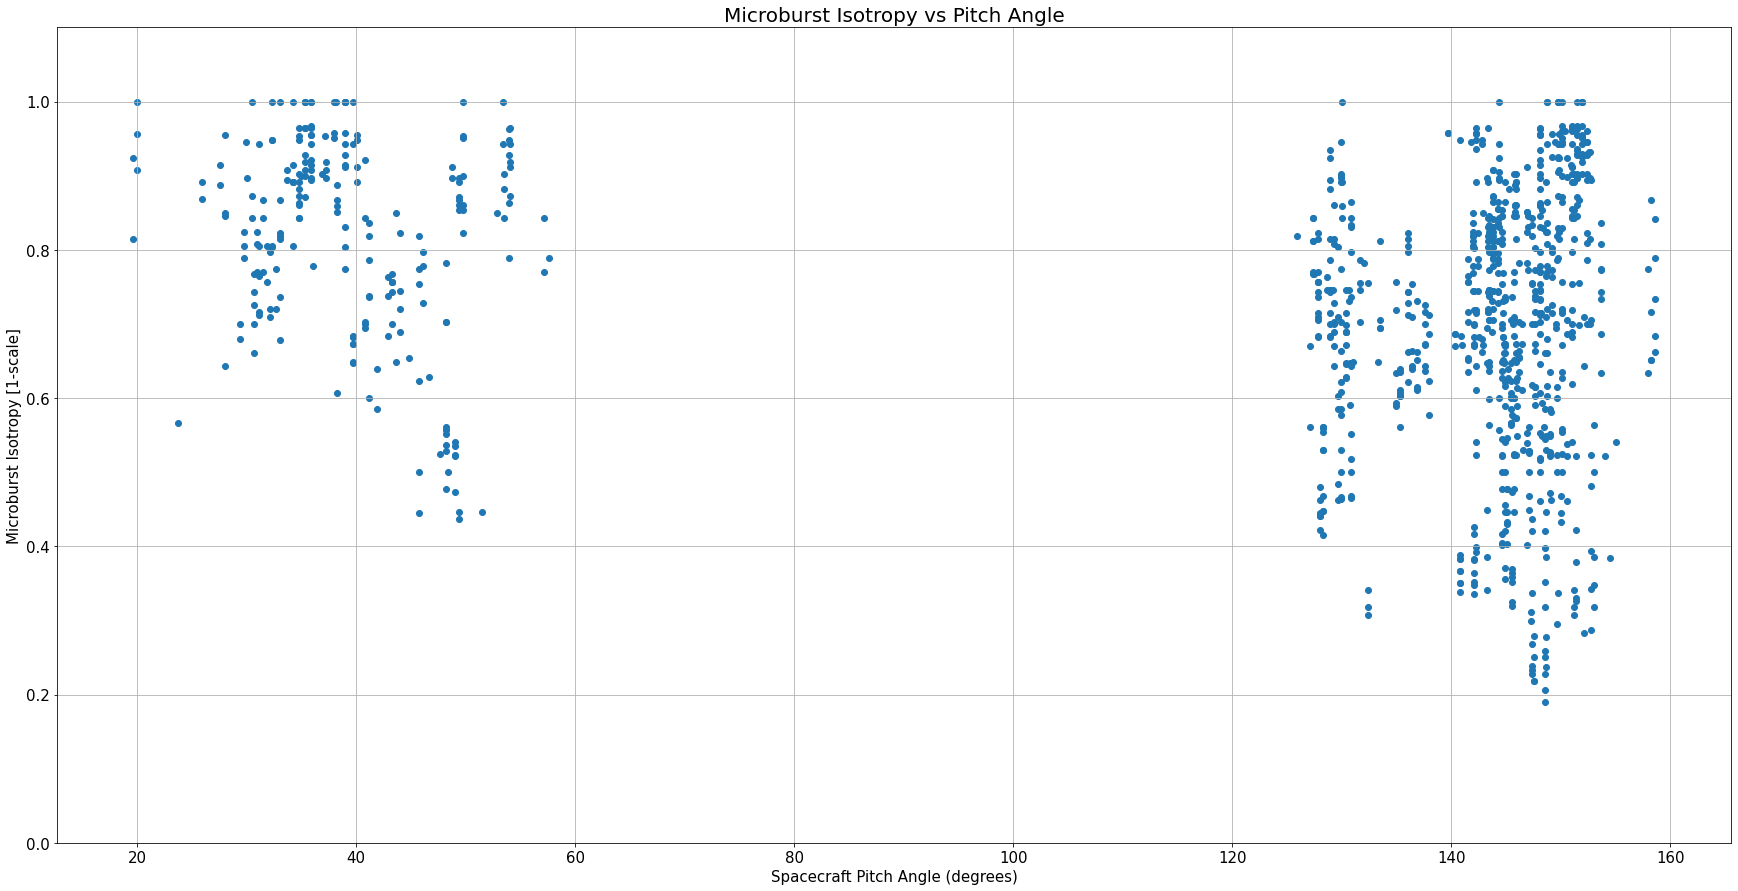

In [10]:
plt.figure(figsize = (30,15))
plt.title('Microburst Isotropy vs Pitch Angle', fontsize = 20)
plt.scatter(P_OrbAtt_mb, iso_indices)
plt.xlabel('Spacecraft Pitch Angle (degrees)', fontsize = 15)
plt.ylabel('Microburst Isotropy [1-scale]', fontsize = 15)
plt.ylim(0, 1.1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

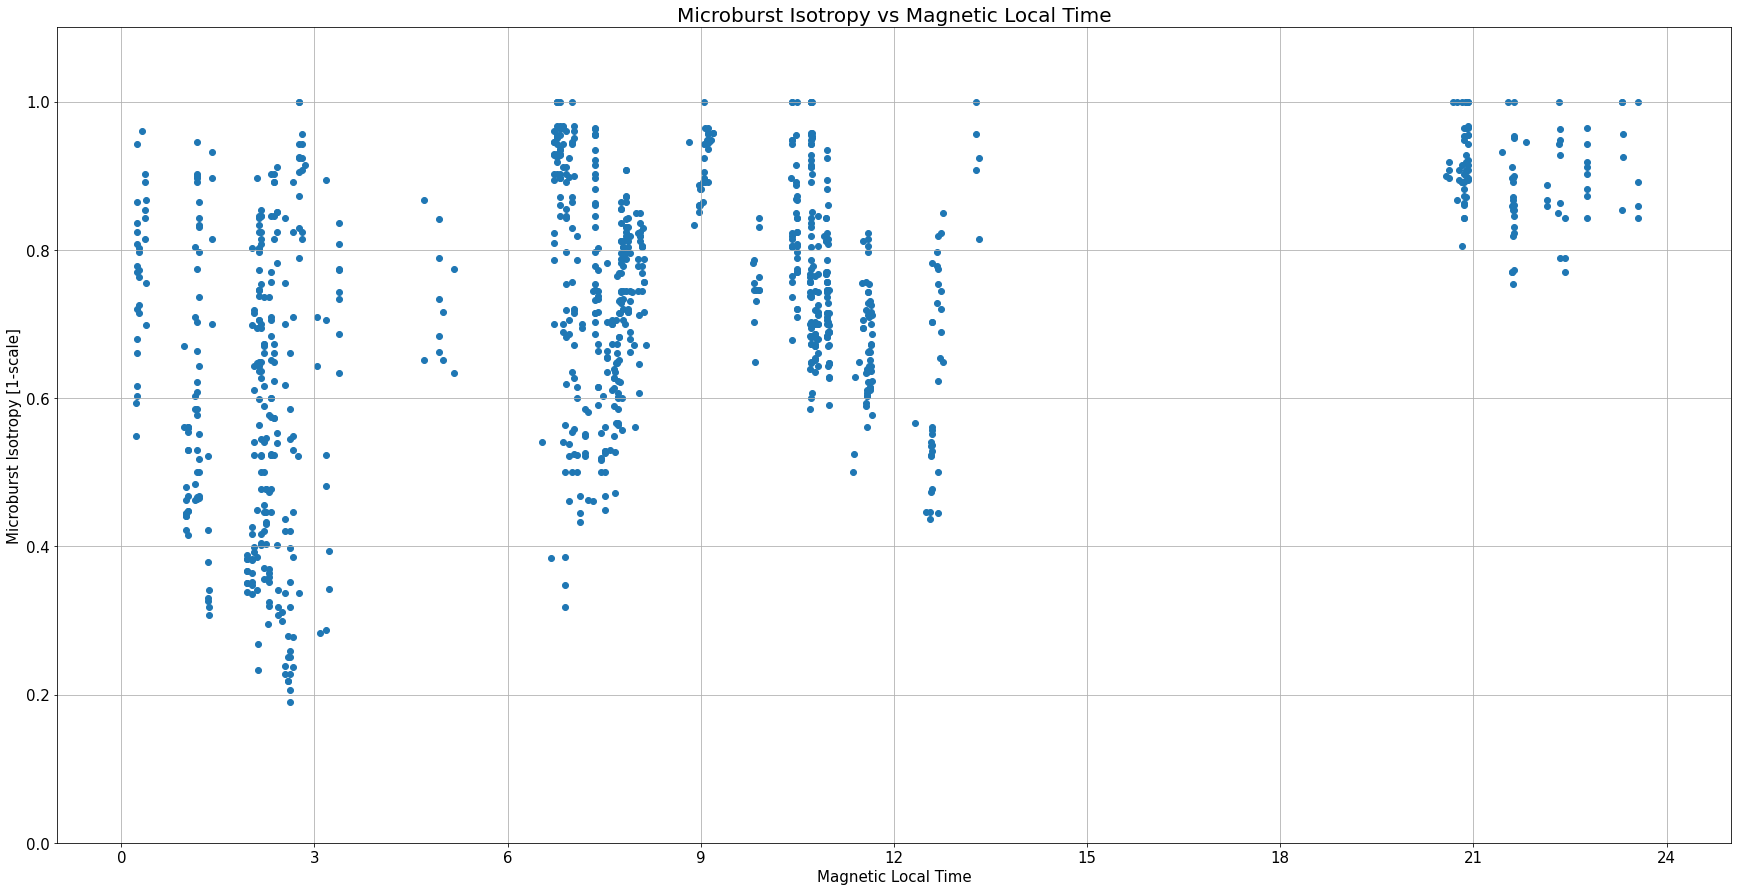

In [11]:
plt.figure(figsize = (30,15))
plt.title('Microburst Isotropy vs Magnetic Local Time', fontsize = 20)
plt.scatter(MLT_OrbAtt_mb, iso_indices)
plt.xlabel('Magnetic Local Time', fontsize = 15)
plt.ylabel('Microburst Isotropy [1-scale]', fontsize = 15)
plt.ylim(0, 1.1)
plt.xlim(-1, 25)
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

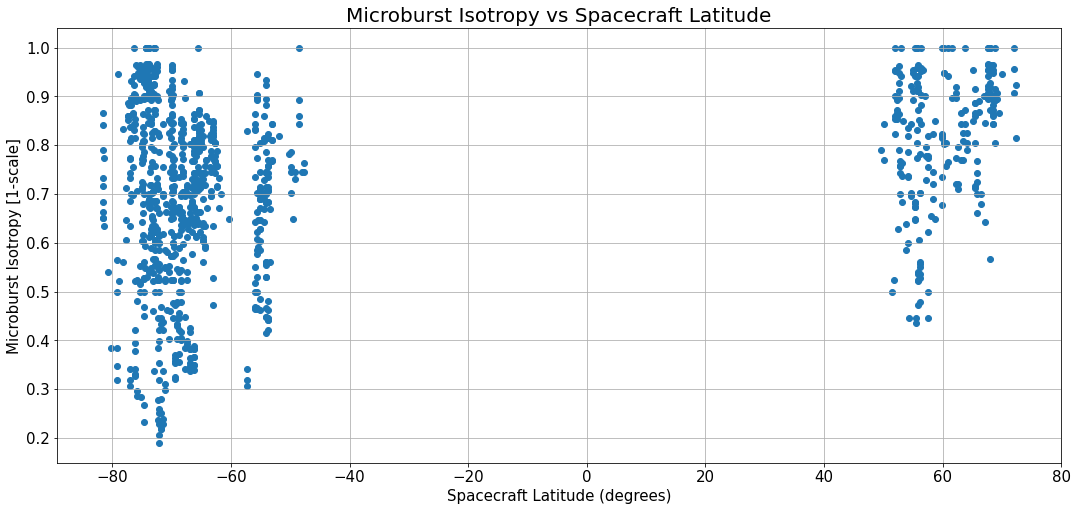

In [12]:
plt.figure(figsize = (18,8))
plt.title('Microburst Isotropy vs Spacecraft Latitude', fontsize = 20)
plt.scatter(Lat_OrbAtt_mb, iso_indices)
plt.xlabel('Spacecraft Latitude (degrees)', fontsize = 15)
plt.ylabel('Microburst Isotropy [1-scale]', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

# 2. Parameter-time/location analysis

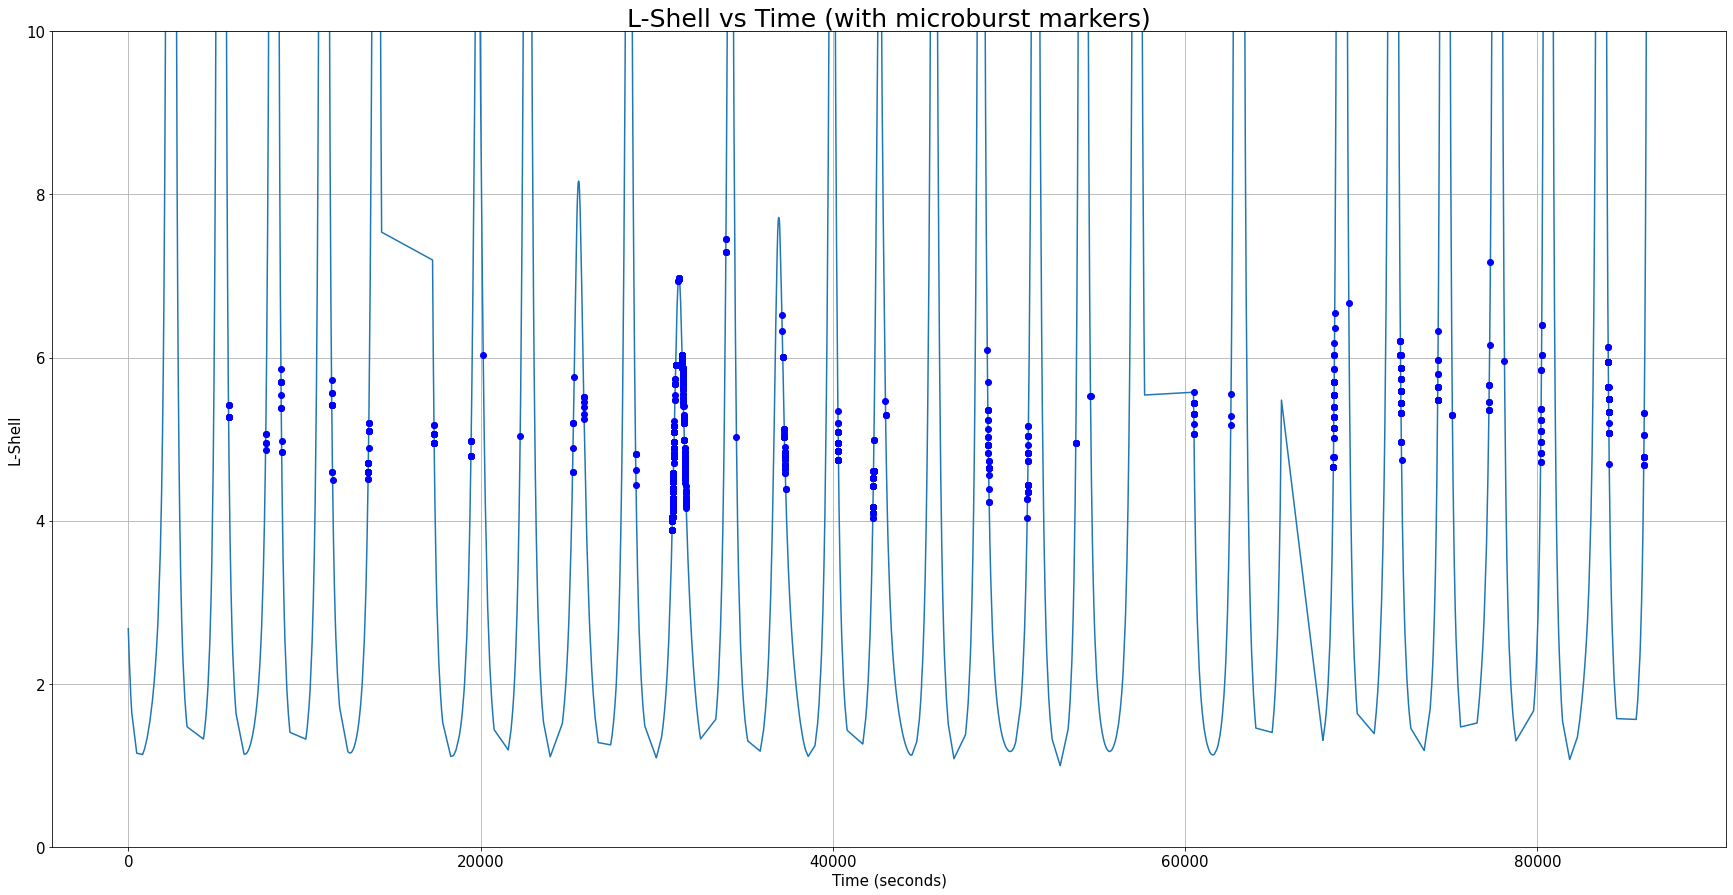

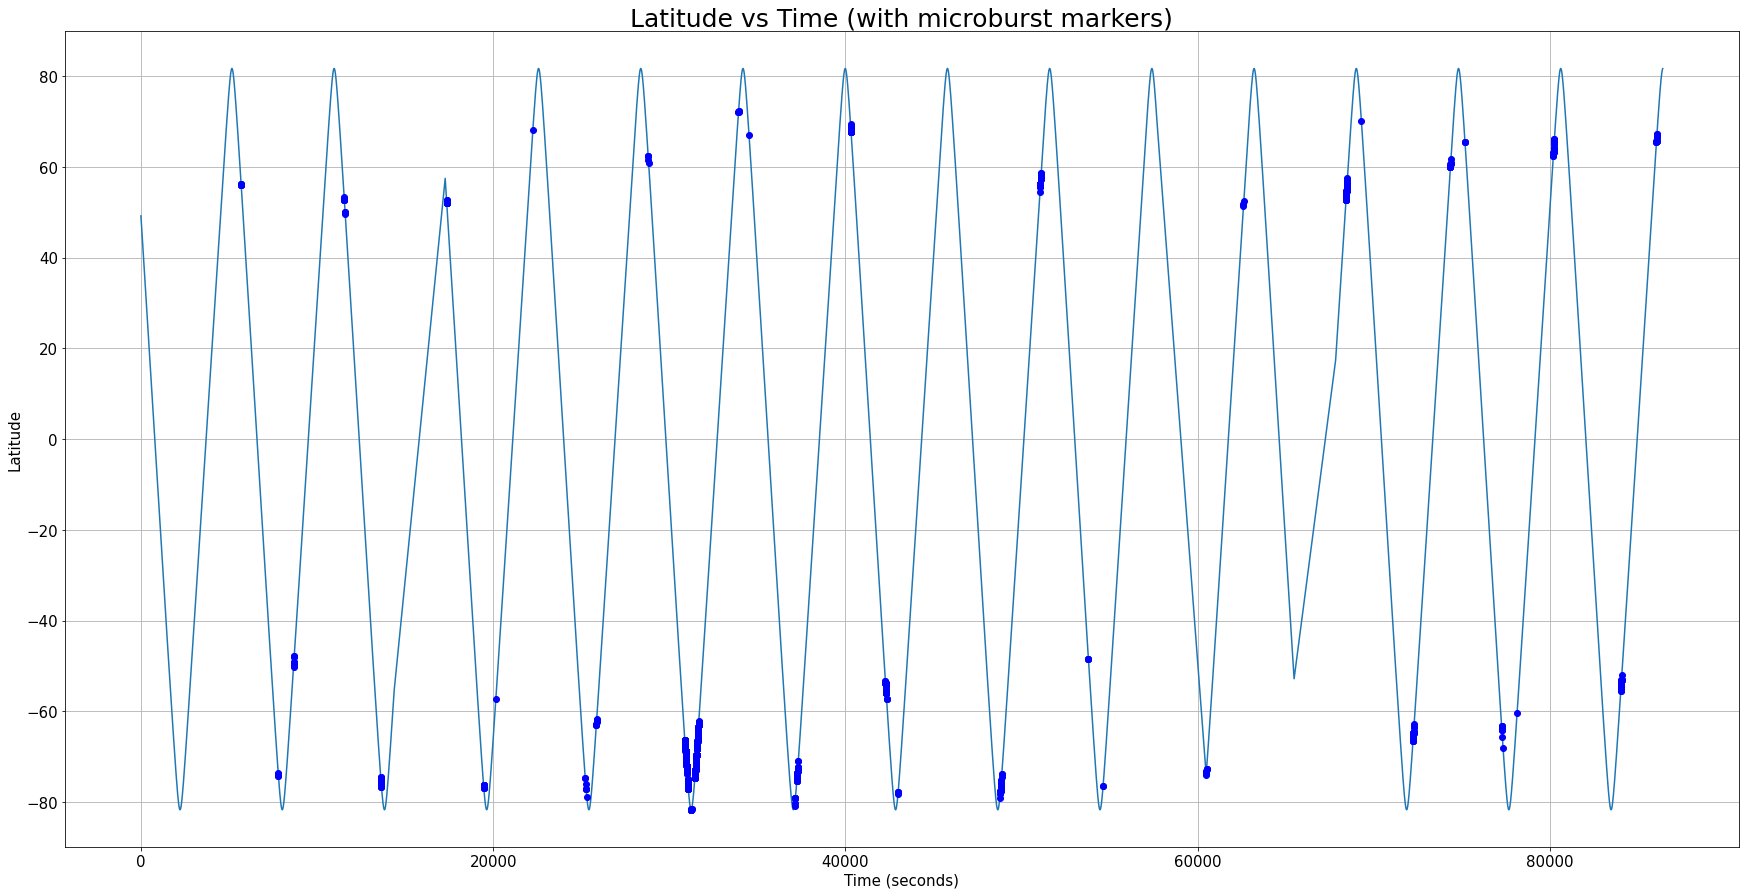

In [15]:
# L-Shell vs time plot
plt.figure(figsize = (30,15))
plt.title('L-Shell vs Time (with microburst markers)', fontsize = 25)
plt.plot(t_OrbAtt, LS_OrbAtt)
plt.plot(t_microburst, LS_OrbAtt_mb, 'bo')
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel('L-Shell', fontsize = 15)
plt.ylim(0, 10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

# Latitude vs time plot
plt.figure(figsize = (30,15))
plt.title('Latitude vs Time (with microburst markers)', fontsize = 25)
plt.plot(t_OrbAtt, Lat_OrbAtt)
plt.plot(t_microburst, Lat_OrbAtt_mb, 'bo')
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

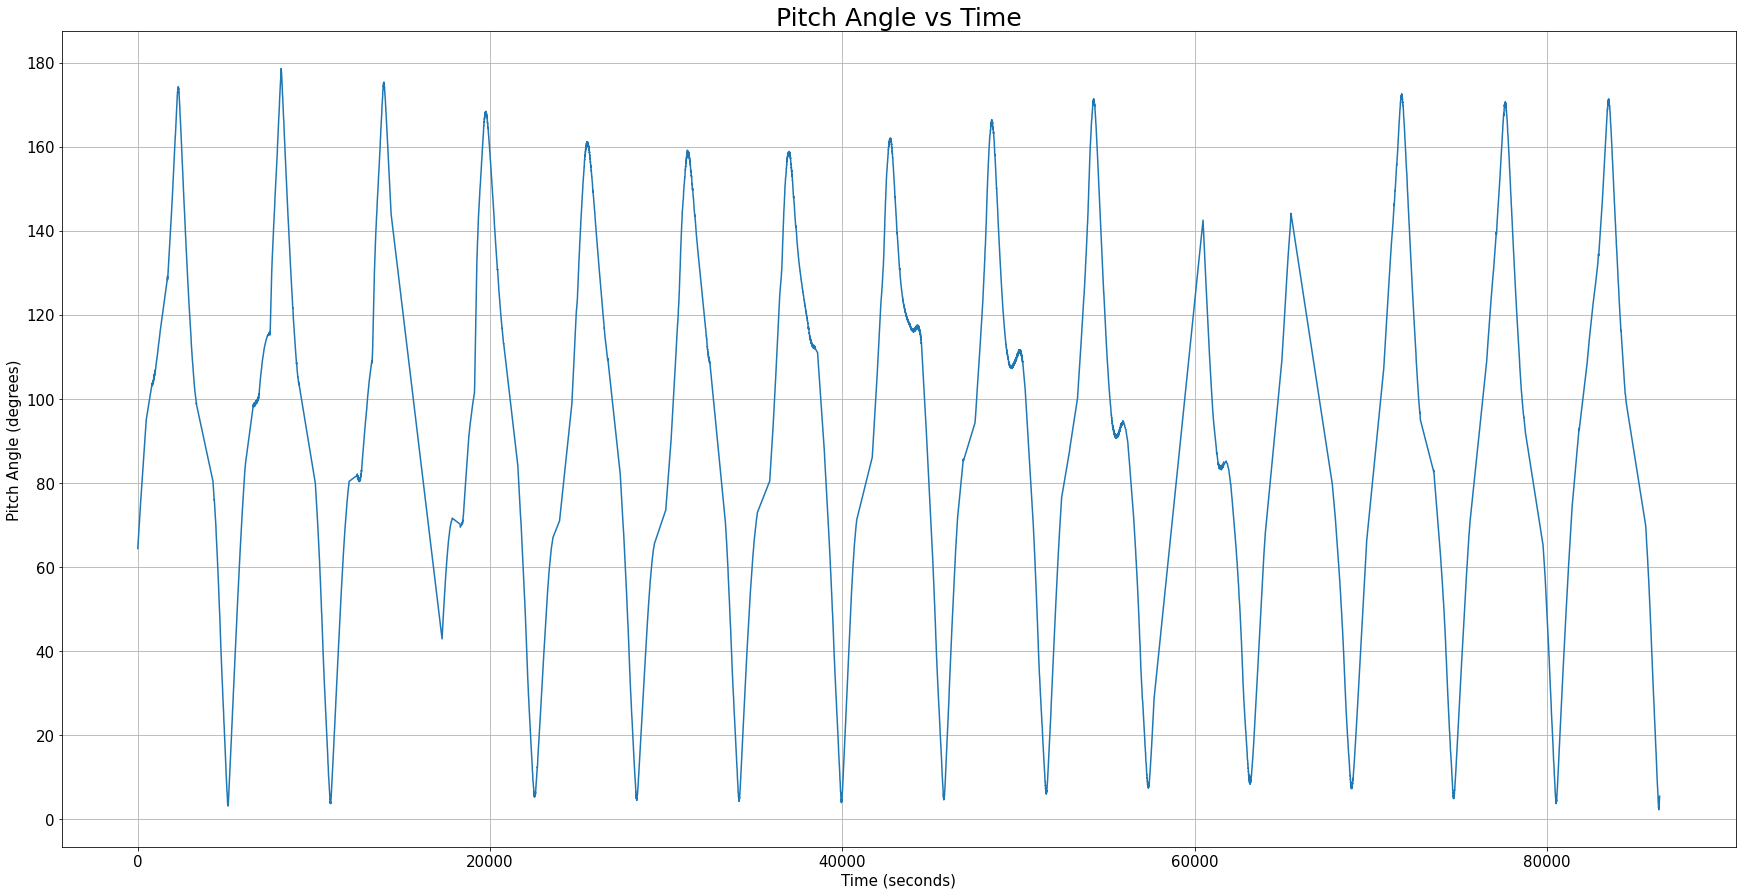

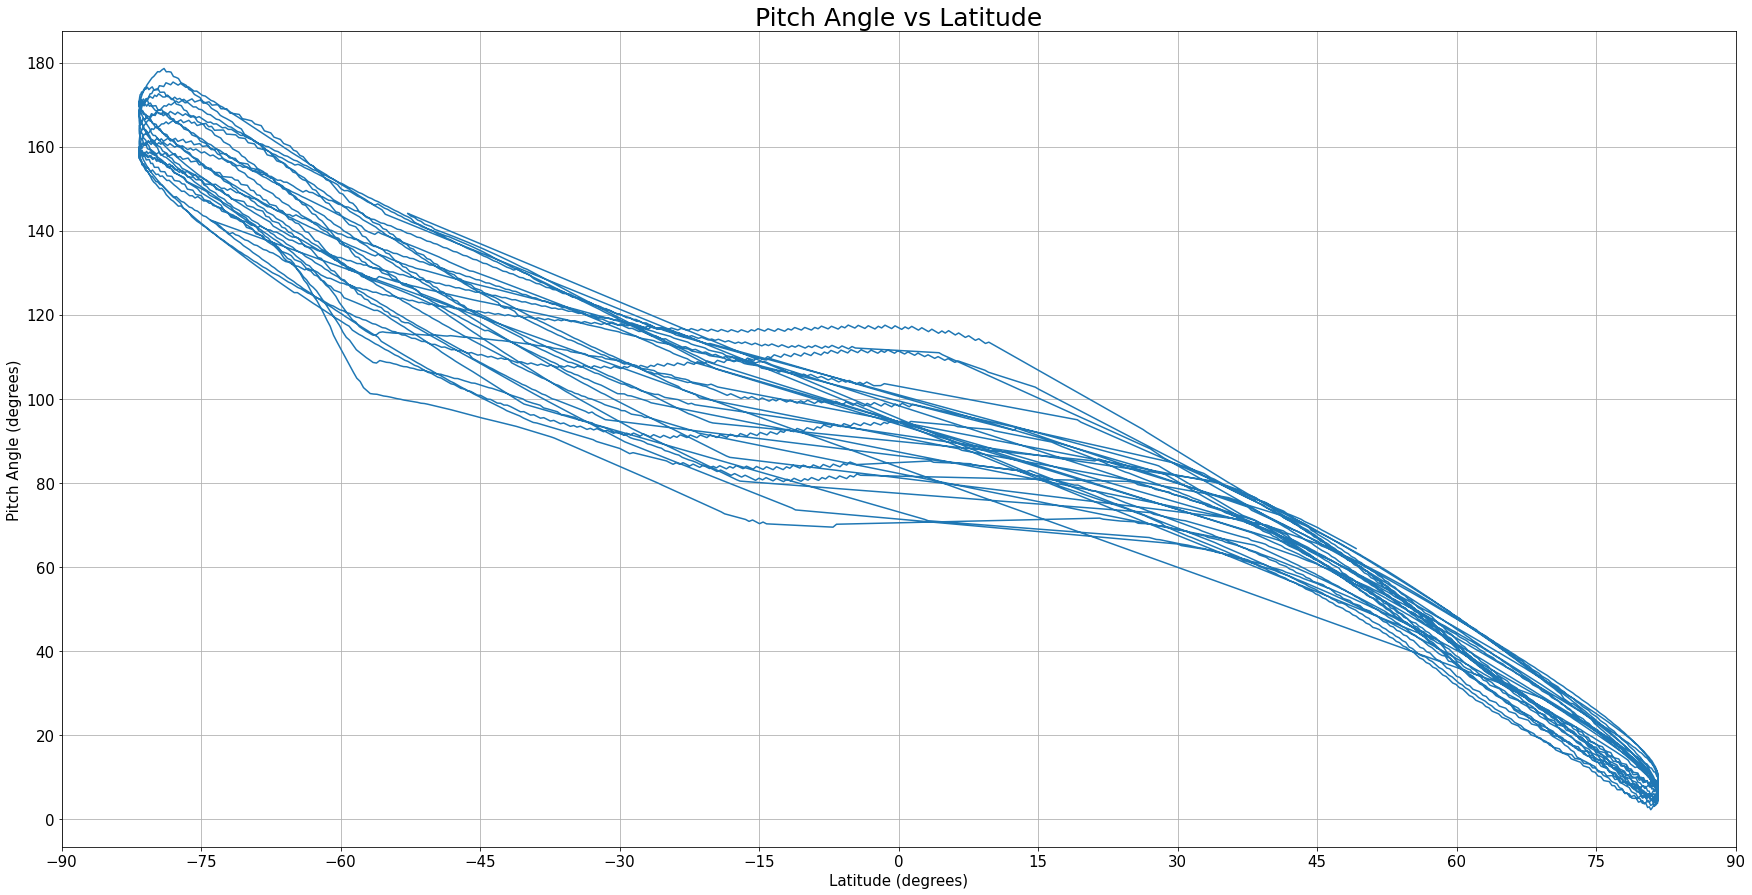

In [17]:
# Pitch Angle vs:
# time plot
plt.figure(figsize = (30,15))
plt.title('Pitch Angle vs Time', fontsize = 25)
plt.plot(t_OrbAtt, P_OrbAtt)
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel('Pitch Angle (degrees)', fontsize = 15)
#plt.ylim(0, 20)
plt.xticks(fontsize = 15)
plt.yticks(np.linspace(0, 180, 10), fontsize = 15)
plt.grid(True)

# lat plot
plt.figure(figsize = (30,15))
plt.title('Pitch Angle vs Latitude', fontsize = 25)
plt.plot(Lat_OrbAtt, P_OrbAtt)
plt.xlabel('Latitude (degrees)', fontsize = 15)
plt.ylabel('Pitch Angle (degrees)', fontsize = 15)
#plt.ylim(0, 20)
plt.xticks(np.linspace(-90, 90, 13), fontsize = 15)
plt.yticks(np.linspace(0, 180, 10), fontsize = 15)
plt.grid(True)

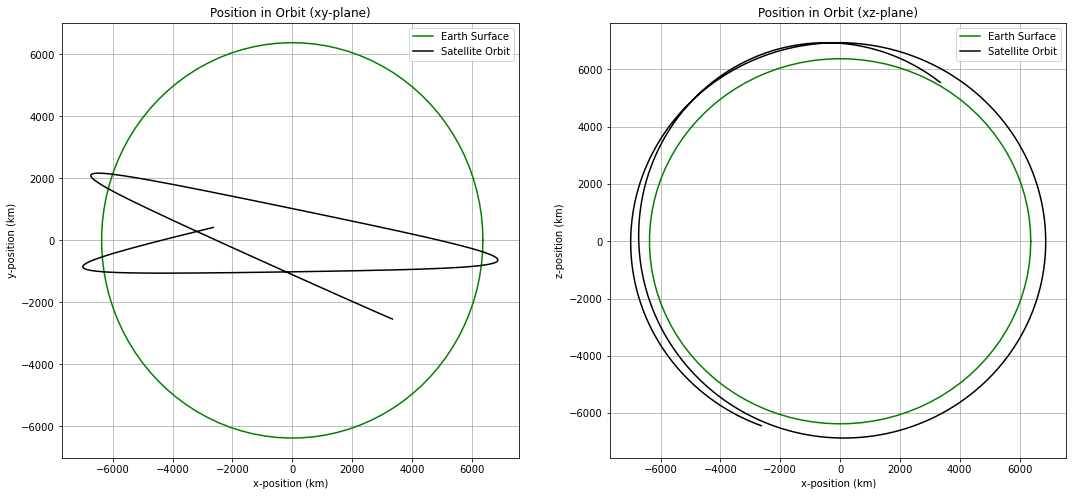

In [23]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize = (18,8))
left = axes[0]
right = axes[1]

# Position (viewed from above Earth): y vs x
t = np.linspace(0, 2*m.pi, 100)  # set of parameters
radius_E = 6375                  # approx Earth radius (km)
x_circle = radius_E * np.cos(t)  # circle x-val
y_circle = radius_E * np.sin(t)  # circle y-val

Radius = OrbAtt_data['GEO_Radius'].values
Lat = OrbAtt_data['GEO_Lat'].values
Long = OrbAtt_data['GEO_Long'].values

start_i = 0 
length = 1500

r = Radius[start_i:start_i+length]; theta = 90 - Lat[start_i:start_i+length];

fi = Long[start_i:start_i+length]          # longitude method
#fi = MLT[start_i:start_i+length] * 15      # MLT method

x_pos = r * np.sin(theta * m.pi/180) * np.cos(fi * m.pi/180); y_pos = r * np.sin(theta * m.pi/180) * np.sin(fi * m.pi/180);
z_pos = r * np.cos(theta * m.pi/180)

left.plot(x_circle, y_circle, 'g')
left.plot(x_pos, y_pos, color = 'k')
left.set_title('Position in Orbit (xy-plane)')
left.set_xlabel('x-position (km)')
left.set_ylabel('y-position (km)')
left.legend(['Earth Surface', 'Satellite Orbit'], loc = 'best')
left.grid(True)

right.plot(x_circle, y_circle, 'g')
right.plot(x_pos, z_pos, color = 'k')
right.set_title('Position in Orbit (xz-plane)')
right.set_xlabel('x-position (km)')
right.set_ylabel('z-position (km)')
right.legend(['Earth Surface', 'Satellite Orbit'], loc = 'best')
right.grid(True)

# 3. Parameter-frequency analysis

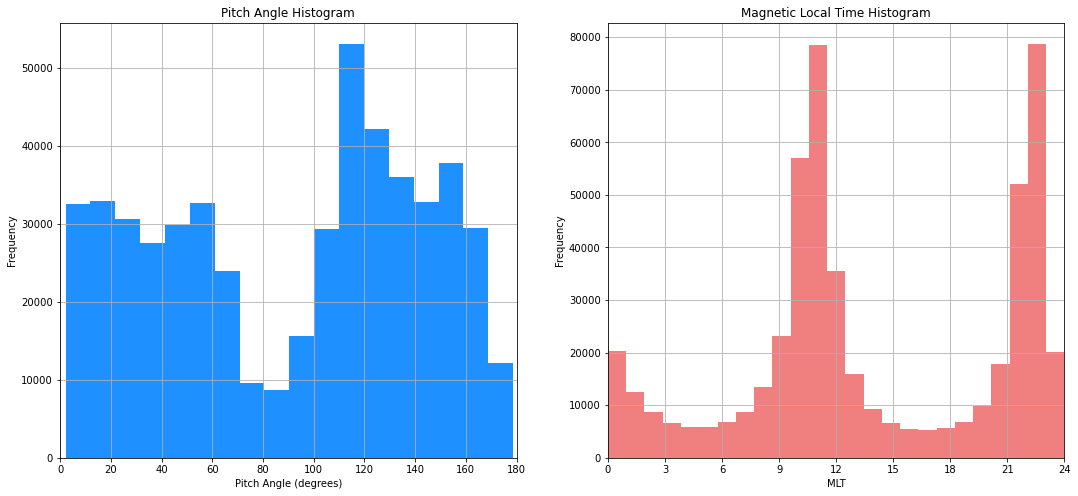

In [24]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize = (18,8))
left = axes[0]
right = axes[1]

# pitch angle histogram
bin_num = 18
P_mean = np.mean(P_OrbAtt)
domain = 200

left.hist(P_OrbAtt, bin_num, color = 'dodgerblue')
left.set_title('Pitch Angle Histogram')
left.set_xlabel('Pitch Angle (degrees)')
left.set_ylabel('Frequency')
left.set_xlim([0,180])
#left.set_ylim(None, 1000)
left.set_xticks(np.linspace(0, 180, 10))
left.grid(True)

# Magnetic Local Time histogram
bin_num = 25
MLT_mean = np.mean(MLT_OrbAtt)
domain = 26

right.hist(MLT_OrbAtt, bin_num, color = 'lightcoral')
right.set_title('Magnetic Local Time Histogram')
right.set_xlabel('MLT')
right.set_ylabel('Frequency')
right.set_xlim([0,24])
right.set_xticks(np.linspace(0, 24, 9))
right.grid(True)